# MLP Model for Flower Classification
I built a MultiLayer Perceptron (MLP) model using Tensorflow Keras to classify images of flowers. I will utilize data augmentation and ImageDataGenerator to preprocess the images, followed by training a MLP model.

## To Run in Google Colab

In [1]:
import zipfile
import os

from google.colab import drive
drive.mount('/content/drive')

# List MyDrive before t
!ls /content/drive/MyDrive/



# Open dataset from zipfile
zip_path = "/content/drive/MyDrive/flowers.zip"
extract_path = '/content/drive/MyDrive/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped successfully!")



# lists all files in Google Drive
!ls /content/drive/MyDrive/

Mounted at /content/drive
 CNN_AutoEncoder.ipynb	        flowers.zip				    WGAN.ipynb
 CNNS_Transfer_Learning.ipynb  'MultiLayer_Perceptron_(MLP) -Model.ipynb'
 Custom_MLP_Model.ipynb         VAE.ipynb
Dataset unzipped successfully!
 CNN_AutoEncoder.ipynb	        flowers_train_validation		    VAE.ipynb
 CNNS_Transfer_Learning.ipynb   flowers.zip				    WGAN.ipynb
 Custom_MLP_Model.ipynb        'MultiLayer_Perceptron_(MLP) -Model.ipynb'


## Run on Local Machine

In [2]:
'''

import os
import zipfile

# Define the paths for the zip file and extraction directory
zip_path = r"C:\path\to\your\flowers.zip"  # Update this to your zip file's actual path
extract_path = r"C:\path\to\extract\directory"  # Update this to your desired extraction directory

# Ensure the extraction path exists
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset unzipped successfully!")
except FileNotFoundError:
    print(f"Error: The file {zip_path} does not exist.")
except zipfile.BadZipFile:
    print(f"Error: The file {zip_path} is not a valid zip file.")

'''


'\n\nimport os\nimport zipfile\n\n# Define the paths for the zip file and extraction directory\nzip_path = r"C:\\path\to\\your\x0clowers.zip"  # Update this to your zip file\'s actual path\nextract_path = r"C:\\path\to\\extract\\directory"  # Update this to your desired extraction directory\n\n# Ensure the extraction path exists\nos.makedirs(extract_path, exist_ok=True)\n\n# Extract the zip file\ntry:\n    with zipfile.ZipFile(zip_path, \'r\') as zip_ref:\n        zip_ref.extractall(extract_path)\n    print("Dataset unzipped successfully!")\nexcept FileNotFoundError:\n    print(f"Error: The file {zip_path} does not exist.")\nexcept zipfile.BadZipFile:\n    print(f"Error: The file {zip_path} is not a valid zip file.")\n\n'

Paths for

In [3]:
# Google CoLab
Train = '/content/drive/MyDrive/flowers_train_validation/train'
Validation = '/content/drive/MyDrive/flowers_train_validation/validation'

# Local Machine
#Train = 'C:/path to local drive for extracted files /flowers_train_validation/train'
#Validation = 'C:/path to local drive for extracted files /flowers_train_validation/validation'

In [4]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

## 1: Data Preparation and Augmentation

### 1.1 Train Data Generator

In [5]:
# Create ImageDataGenerators for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [6]:
train_generator = train_datagen.flow_from_directory(
    Train,  # This is the target directory
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=128,
    class_mode='categorical'
)

Found 3458 images belonging to 5 classes.


In [7]:
# displaying the basic information of train generator
print(f"Number of samples: {train_generator.samples}")
print(f"Class indices: {train_generator.class_indices}")
print(f"Batch size: {train_generator.batch_size}")
print(f"Image shape: {train_generator.image_shape}")
print(f"Number of classes: {train_generator.num_classes}")
print(f"Target size: {train_generator.target_size}")
print(f"Filenames: {train_generator.filenames[:5]}")

Number of samples: 3458
Class indices: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Batch size: 128
Image shape: (150, 150, 3)
Number of classes: 5
Target size: (150, 150)
Filenames: ['daisy/daisy_000002.png', 'daisy/daisy_000004.png', 'daisy/daisy_000007.png', 'daisy/daisy_000008.png', 'daisy/daisy_000009.png']


### 1.2 Validation Data Generator

In [8]:
valid_datagen=ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
    Validation,  # This is the target directory
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical')

Found 865 images belonging to 5 classes.


In [9]:
# display the basic information of validation generator

print(f"Number of samples: {valid_generator.samples}")
print(f"Class indices: {valid_generator.class_indices}")
print(f"Batch size: {valid_generator.batch_size}")
print(f"Image shape: {valid_generator.image_shape}")
print(f"Number of classes: {valid_generator.num_classes}")
print(f"Target size: {valid_generator.target_size}")
print(f"Filenames: {valid_generator.filenames[:5]}")

Number of samples: 865
Class indices: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Batch size: 128
Image shape: (150, 150, 3)
Number of classes: 5
Target size: (150, 150)
Filenames: ['daisy/daisy_000001.png', 'daisy/daisy_000003.png', 'daisy/daisy_000005.png', 'daisy/daisy_000006.png', 'daisy/daisy_000012.png']


### 2: Display flower dataset from train/validation generator

In [10]:
print(type(train_generator))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [11]:
# Get a batch of images and labels
batch = next(train_generator)

batch_images, batch_labels = batch[0], batch[1]
print(batch_images.shape, batch_labels.shape)

# Get the first image and label from the batch
first_image = batch_images[0]  # First image
first_label = batch_labels[0]  # First label

# Print shape and label to verify
print(f"First image shape: {first_image.shape}")
print(f"First label: {first_label}")

(128, 150, 150, 3) (128, 5)
First image shape: (150, 150, 3)
First label: [0. 0. 0. 1. 0.]


#### Display the flowers
The first 10 images from the batch of train generator



In [12]:
# Display the first 10 images and print out the corresponging labels
batch_images, batch_labels = next(train_generator)

display(batch_images[:10])
print(batch_labels[:10])

array([[[[0.9355457 , 0.46248946, 0.23786886],
         [0.9787093 , 0.60005975, 0.18190163],
         [0.97508717, 0.6248396 , 0.0990831 ],
         ...,
         [0.31054452, 0.2565514 , 0.14737017],
         [0.2656684 , 0.22449702, 0.17942457],
         [0.27512267, 0.24948959, 0.23049462]],

        [[0.92695975, 0.3705001 , 0.11258167],
         [0.93878454, 0.5393944 , 0.1475127 ],
         [0.9917316 , 0.647733  , 0.1925099 ],
         ...,
         [0.293773  , 0.24457175, 0.15934984],
         [0.26307786, 0.2274074 , 0.19636758],
         [0.2823105 , 0.26266724, 0.25086007]],

        [[0.88719517, 0.342162  , 0.09113666],
         [0.9182145 , 0.45627233, 0.10521153],
         [0.96925455, 0.6102882 , 0.14926828],
         ...,
         [0.27700147, 0.23259208, 0.17132953],
         [0.27026567, 0.24058504, 0.21673304],
         [0.27997118, 0.26036334, 0.24740773]],

        ...,

        [[0.18431373, 0.3324258 , 0.11764707],
         [0.1892176 , 0.32450795, 0.11519513]

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


### 3: Building the MLP Model
Now you will build the MLP model using Keras' Sequential API.

In [13]:
# import necessary libaries if needed
from tensorflow.keras import layers, models

# you model below
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [14]:
# your model below
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 200)               13500200  
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 5)                 755       
                                                                 
Total params: 13531105 (51.62 MB)
Trainable params: 13531105 (51.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4: Compiling the Model

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 5: Training the MLP Model

In [16]:
# Do not delete the following line, otherwise you will get the problem when fitting.
train_generator.reset()  # This resets the generator to start from the beginning  to clear memory of Generator

In [17]:
# Train the model
history = model.fit(train_generator, epochs=30, validation_data=valid_generator)

Epoch 1/30
28/28 [==============================] - 28s 986ms/step - loss: 9.1870 - accuracy: 0.2444 - val_loss: 2.6016 - val_accuracy: 0.3098
Epoch 2/30
28/28 [==============================] - 26s 949ms/step - loss: 2.0911 - accuracy: 0.3392 - val_loss: 2.5767 - val_accuracy: 0.3133
Epoch 3/30
28/28 [==============================] - 26s 940ms/step - loss: 2.1129 - accuracy: 0.3245 - val_loss: 1.5217 - val_accuracy: 0.4069
Epoch 4/30
28/28 [==============================] - 26s 934ms/step - loss: 1.7690 - accuracy: 0.3545 - val_loss: 3.7845 - val_accuracy: 0.2347
Epoch 5/30
28/28 [==============================] - 26s 929ms/step - loss: 2.3832 - accuracy: 0.3161 - val_loss: 1.5478 - val_accuracy: 0.3618
Epoch 6/30
28/28 [==============================] - 26s 935ms/step - loss: 1.7352 - accuracy: 0.3473 - val_loss: 1.4498 - val_accuracy: 0.4139
Epoch 7/30
28/28 [==============================] - 26s 938ms/step - loss: 1.9368 - accuracy: 0.3401 - val_loss: 1.4840 - val_accuracy: 0.3665

In [18]:
# extract information
print(history.history['accuracy'][:2]) # train accuracy on the first two epochs
print(history.history['val_accuracy'][:2]) # validation accuracy on the first two epochs
print(history.history['loss'][:2]) # train loss on the first two epochs
print(history.history['val_loss'][:2]) # validation loss on the first two epochs

[0.24436090886592865, 0.33921343088150024]
[0.3098265826702118, 0.31329479813575745]
[9.18701171875, 2.0910956859588623]
[2.601642608642578, 2.5767440795898438]


#### Plot train/valiation loss and accuracy


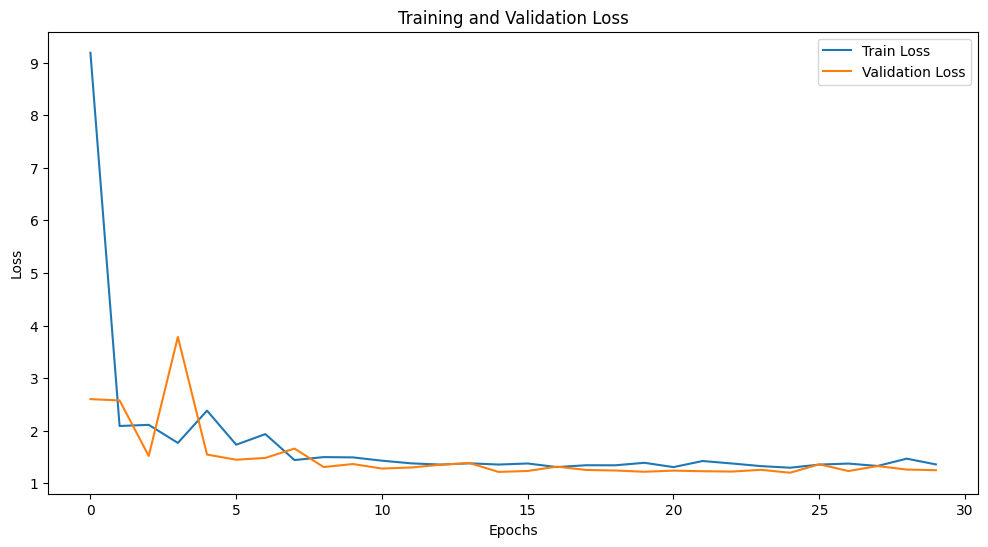

In [19]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(12, 6))

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axis('on')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

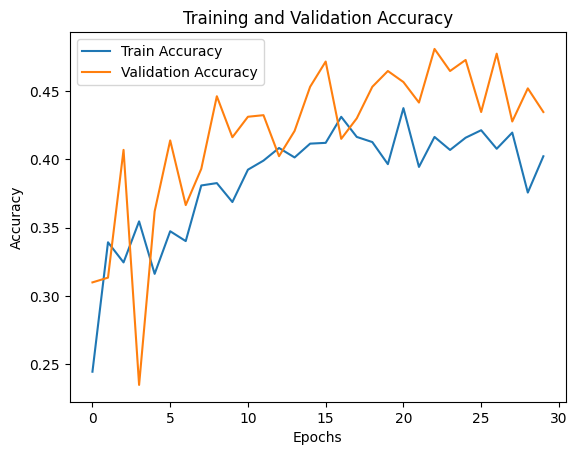

In [20]:
# Plot the training and validation loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axis('on')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()